In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import requests
import pandas as pd
from matplotlib import pyplot as plt

from water_pollution.api import ann_utils as util

In [56]:
util.get_stations_df().sort_values('alt',ascending=False).sort_values('alt',ascending=False)

,label,alt,river_id,river_label,coord,mean_nitrate
id,,,,,,
6000990,BELRUPT,292,U---0000,La Saône,"(48.090273327987276, 6.101940890815991)",4.513699
6000998,MONTHUREUX-SUR-SAONE 2,241,U---0000,La Saône,"(48.01825125838868, 5.941492053405311)",6.428571
6000993,JONVELLE,230,U---0000,La Saône,"(47.93638044949666, 5.923536232871648)",9.433333
6001000,CENDRECOURT,213,U---0000,La Saône,"(47.84026083741255, 5.917378095285407)",9.233333
6003600,SCEY-SUR-SAONE-ET-ST-ALBI,210,U---0000,La Saône,"(47.661731120409826, 5.972459738821173)",8.421519
6002500,PORT-SUR-SAONE,208,U---0000,La Saône,"(47.69107833426886, 6.039291564176292)",7.489474
6005500,APREMONT 1,190,U---0000,La Saône,"(47.39571566626848, 5.544088676925676)",10.553020
6011000,AUXONNE 1,185,U---0000,La Saône,"(47.194519280308995, 5.382571963766932)",10.828667
6017050,CHARREY-SUR-SAONE,180,U---0000,La Saône,"(47.07369860831355, 5.165636185828038)",10.831410


In [53]:
# Resquests the API
url = 'https://api-te5jtpgwkq-ew.a.run.app/predict'
params = { 'station_id':6059500}
response = requests.get(url,params)

# Converts the response to a dataframe
jr = response.json()
preddf = pd.DataFrame(jr)
preddf.date = pd.to_datetime(preddf.date)
preddf.set_index('date',inplace=True)

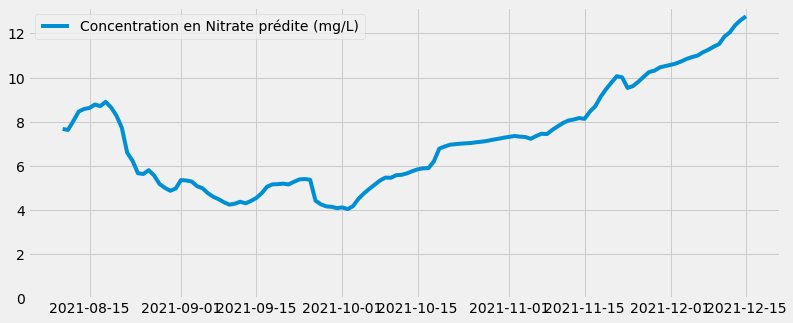

In [54]:
with plt.style.context('fivethirtyeight'):
    
    plt.figure(figsize=(12,5))
    plt.plot(preddf.index,preddf.prediction,label='Concentration en Nitrate prédite (mg/L)')
    
    plt.legend()
    plt.ylim(bottom=0)
    plt.show()
    

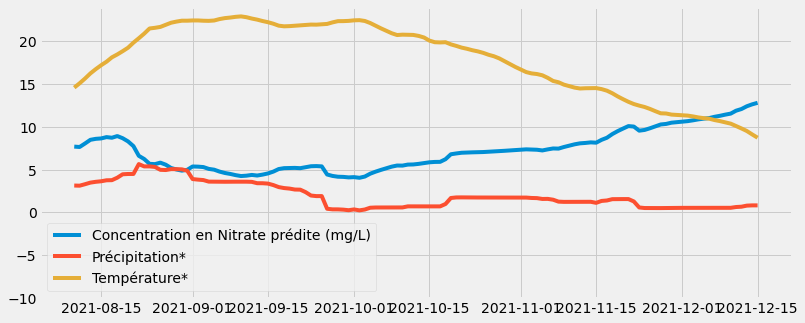

In [55]:
with plt.style.context('fivethirtyeight'):
    
    plt.figure(figsize=(12,5))
    plt.plot(preddf.index,preddf.prediction,label='Concentration en Nitrate prédite (mg/L)')
    plt.plot(preddf.index,preddf.precipitation,label='Précipitation*')
    plt.plot(preddf.index,preddf.temp,label='Température*')
    plt.legend()
    plt.ylim(bottom=-10)
    plt.show()